In [1]:
# Detail of Homework 1 Pick 5 stocks between 2009-2019
import yfinance as yf
import math
def log_base_e( input ):
    return math.log( input , math.exp(1) ) 

In [2]:
# Import other library about calculate and plot graph
import pandas as pd 
import time
import matplotlib.pyplot as plt 
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Set name of STOCKS
stocks_name = "MU SIRI ECA PFE YPF"
stocks_key = ["MU" , "SIRI" , "ECA" , "PFE" , "YPF"]
focus_main_key = 'Adj Close'

In [4]:
# Link website https://finance.yahoo.com/most-active
data = yf.download( stocks_name , start="2009-04-04", end="2019-04-04")
data.fillna(method='bfill', inplace=True)

[*********************100%***********************]  5 of 5 downloaded


In [5]:
data.columns

MultiIndex([('Adj Close',  'ECA'),
            ('Adj Close',   'MU'),
            ('Adj Close',  'PFE'),
            ('Adj Close', 'SIRI'),
            ('Adj Close',  'YPF'),
            (    'Close',  'ECA'),
            (    'Close',   'MU'),
            (    'Close',  'PFE'),
            (    'Close', 'SIRI'),
            (    'Close',  'YPF'),
            (     'High',  'ECA'),
            (     'High',   'MU'),
            (     'High',  'PFE'),
            (     'High', 'SIRI'),
            (     'High',  'YPF'),
            (      'Low',  'ECA'),
            (      'Low',   'MU'),
            (      'Low',  'PFE'),
            (      'Low', 'SIRI'),
            (      'Low',  'YPF'),
            (     'Open',  'ECA'),
            (     'Open',   'MU'),
            (     'Open',  'PFE'),
            (     'Open', 'SIRI'),
            (     'Open',  'YPF'),
            (   'Volume',  'ECA'),
            (   'Volume',   'MU'),
            (   'Volume',  'PFE'),
            (   'Vol

In [6]:
# Table of Data
data

Adj Close                             Close                      \
                 ECA     MU    PFE  SIRI    YPF    ECA     MU    PFE  SIRI   
Date                                                                         
2009-04-03   19.0905   4.50   9.18  0.34  18.45  44.78   4.50  13.55  0.35   
2009-04-06   18.8262   4.52   9.29  0.35  18.28  44.16   4.52  13.71  0.36   
2009-04-07   18.1568   4.31   9.15  0.33  18.88  42.59   4.31  13.51  0.34   
2009-04-08   18.4169   4.28   9.13  0.32  18.88  43.20   4.28  13.48  0.33   
2009-04-09   19.2013   4.45   9.18  0.34  18.41  45.04   4.45  13.55  0.35   
...              ...    ...    ...   ...    ...    ...    ...    ...   ...   
2019-03-28    7.1020  39.34  41.53  5.67  13.58   7.13  39.34  42.29  5.69   
2019-03-29    7.2115  41.33  41.71  5.65  13.90   7.24  41.33  42.47  5.67   
2019-04-01    7.3709  42.25  42.07  5.77  14.34   7.40  42.25  42.84  5.79   
2019-04-02    7.1717  42.44  42.14  5.85  14.21   7.20  42.44  42.91  5.87   
2019-04-03    6.8231  43.90  42.07  5.90  14.32   6.85  43.90  42.84  5.92   

                   ...   Open                               Volume             \
              YPF  ...    ECA     MU    PFE  SIRI    YPF       ECA         MU   
Date               ...                                                          
2009-04-03  25.36  ...  44.17   4.43  13.59  0.35  24.58   2588100   24172900   
2009-04-06  25.13  ...  44.20   4.41  13.56  0.35  25.10   2697300   21403700   
2009-04-07  25.95  ...  43.16   4.31  13.62  0.35  25.95   2521800   28308000   
2009-04-08  25.95  ...  42.41   4.20  13.54  0.34  25.94   2633000   48840200   
2009-04-09  25.31  ...  44.87   4.43  13.62  0.34  25.48   2605600  101931500   
...           ...  ...    ...    ...    ...   ...    ...       ...        ...   
2019-03-28  13.69  ...   7.07  39.40  42.18  5.65  13.30  18524400   24584500   
2019-03-29  14.01  ...   7.23  40.25  42.40  5.70  13.85  18684800   35716900   
2019-04-01  14.45  ...   7.39  42.27  42.58  5.70  14.22  18978200   28073000   
2019-04-02  14.32  ...   7.44  42.08  42.95  5.79  14.47  20483400   21438100   
2019-04-03  14.43  ...   7.26  43.55  42.99  5.89  14.50  58448700   39097200   

                                         
                 PFE      SIRI      YPF  
Date                                     
2009-04-03  52919400  31290200     4700  
2009-04-06  59575800  21487600     3300  
2009-04-07  50073700  18175400      200  
2009-04-08  41968500  18324500     1900  
2009-04-09  55024300  37367200     3600  
...              ...       ...      ...  
2019-03-28  16048900  21798900   719500  
2019-03-29  20571000  30656300  2711100  
2019-04-01  19302700  38541000  1158300  
2019-04-02  17670900  32882500   532300  
2019-04-03  15370400  29878800  1261200  

[2517 rows x 30 columns]

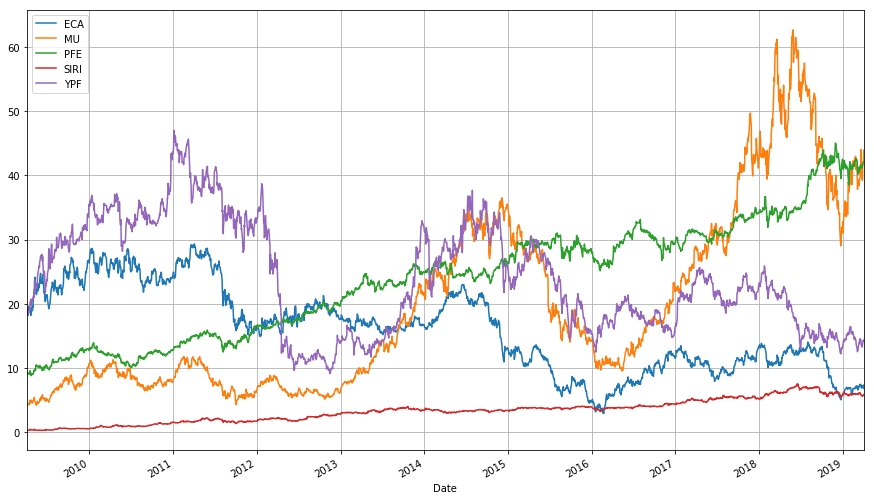

In [7]:
# Plot historical prices by focus on Adj Close
data["Adj Close"].plot(grid = True , figsize=(15,9))

In [8]:
# Part of calculate
simple_daily_return = data.tail(data.shape[0]-1)[ focus_main_key ]
# Lecture 2 page 5 function for simple return
def simple_return( current , previous):
    return ( current / previous ) - 1
    
for key in simple_daily_return.keys():
    for order in range( simple_daily_return.shape[0] ):
        simple_daily_return[key][order] = simple_return( simple_daily_return[key][order] 
                                                        , data[focus_main_key][key][order])

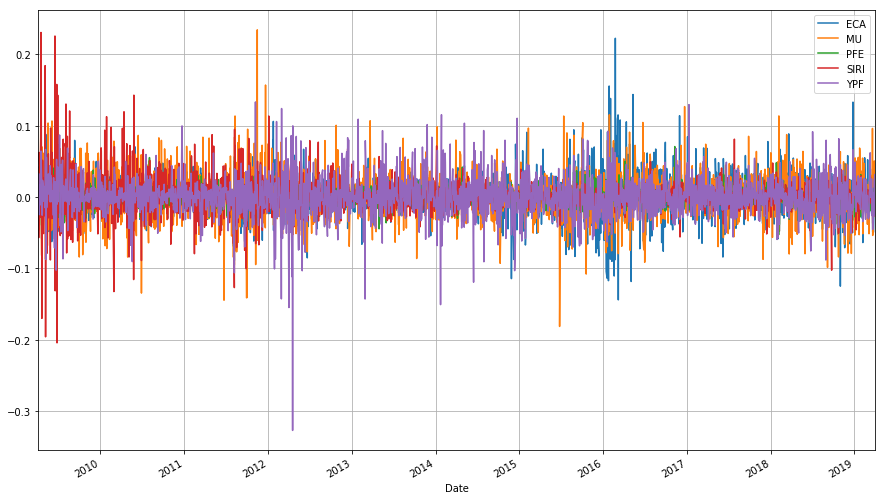

In [9]:
simple_daily_return.plot(grid=True , figsize=(15,9))

In [10]:
# Part of calculate
log_daily_return = data.tail(data.shape[0]-1)[ focus_main_key ]
# Lecture 2 page 9 function for log return 
def log_return( current , previous ):
    return log_base_e(current) - log_base_e( previous )

for key in log_daily_return.keys():
    for order in range( log_daily_return.shape[0] ):
        log_daily_return[key][order] = log_return( log_daily_return[key][order] 
                                                        , data[focus_main_key][key][order])

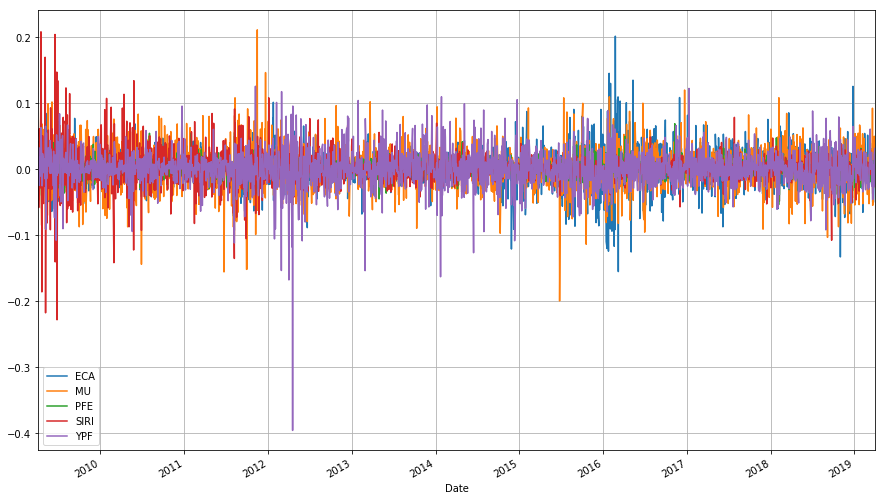

In [11]:
log_daily_return.plot(grid=True , figsize=(15,9))

In [12]:
# This part is excersize number 3 Check how many days in a year in the historical data and plot annualize returns.
count_data = simple_daily_return.resample('BAS').count()
def log_base_e_plus_1( input ):
    return log_base_e( input + 1)

temp_data = simple_daily_return.copy()

for key in temp_data.keys():
    for run in range(temp_data.shape[0]): 
        temp_data[key][run] = log_base_e_plus_1( temp_data[key][run] )

In [13]:
annualize_return = temp_data.resample('BAS').sum()
annualize_return

,ECA,MU,PFE,SIRI,YPF
Date,,,,,
2009-01-01,0.322274,0.852996,0.325362,0.534082,0.646266
2010-01-01,-0.080704,-0.275135,0.003142,0.989413,0.208668
2011-01-03,-0.419635,-0.242977,0.252969,0.114930,-0.285686
2012-01-02,0.102581,0.007918,0.185666,0.477121,-0.852423
2013-01-01,-0.053923,1.232735,0.232708,0.189975,0.826319
2014-01-01,-0.248377,0.476020,0.051554,0.002928,-0.215225
2015-01-01,-0.969899,-0.905213,0.068409,0.151641,-0.515130
2016-01-01,0.843047,0.436978,0.043137,0.091190,0.056541
2017-01-02,0.132811,0.629095,0.147563,0.193346,0.333114


Date
2009-01-01    188
2010-01-01    252
2011-01-03    252
2012-01-02    250
2013-01-01    252
2014-01-01    252
2015-01-01    252
2016-01-01    252
2017-01-02    251
2018-01-01    251
2019-01-01     64
Freq: BAS-JAN, Name: ECA, dtype: int64


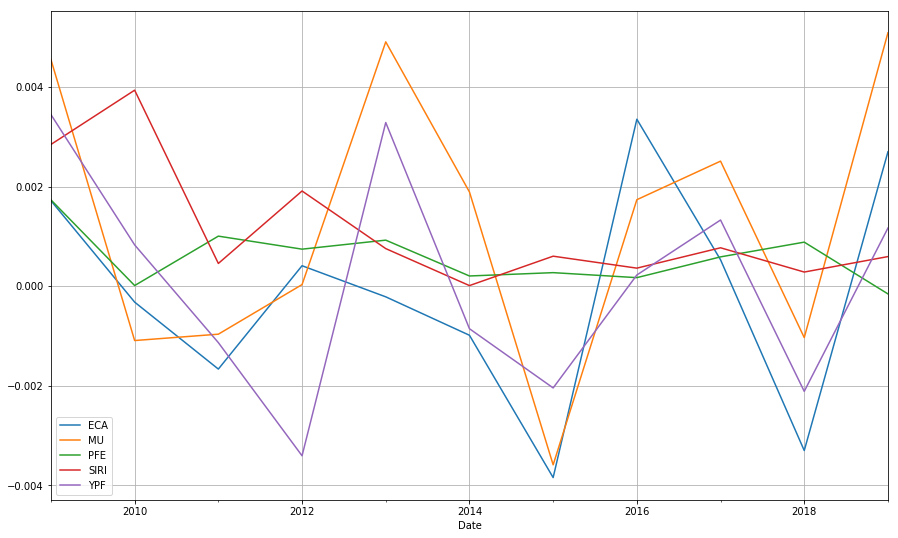

In [14]:
annualize_return = temp_data.resample('BAS').sum()
for key in annualize_return.keys():
    for order in range( annualize_return.shape[0] ):
        annualize_return[key][order] = math.exp( (annualize_return[key][order] / count_data[key][order] ) ) - 1
annualize_return.plot(grid=True , figsize=(15,9))
print(repr(count_data[ count_data.keys()[0]]))

In [15]:
# Next is excercise number 4 find cov and cor
simple_daily_return.corr()

,ECA,MU,PFE,SIRI,YPF
ECA,1.000000,0.298627,0.240790,0.190810,0.281040
MU,0.298627,1.000000,0.307681,0.280433,0.203025
PFE,0.240790,0.307681,1.000000,0.225417,0.189875
SIRI,0.190810,0.280433,0.225417,1.000000,0.158415
YPF,0.281040,0.203025,0.189875,0.158415,1.000000


In [16]:
simple_daily_return.cov()

,ECA,MU,PFE,SIRI,YPF
ECA,0.000745,0.000250,0.000078,0.000129,0.000210
MU,0.000250,0.000938,0.000113,0.000213,0.000170
PFE,0.000078,0.000113,0.000143,0.000067,0.000062
SIRI,0.000129,0.000213,0.000067,0.000617,0.000108
YPF,0.000210,0.000170,0.000062,0.000108,0.000750


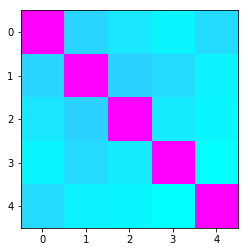

In [17]:
plt.imshow(simple_daily_return.corr() , cmap='cool', interpolation='nearest')
plt.show()

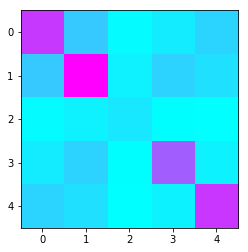

In [18]:
plt.imshow(simple_daily_return.cov(), cmap='cool', interpolation='nearest')
plt.show()

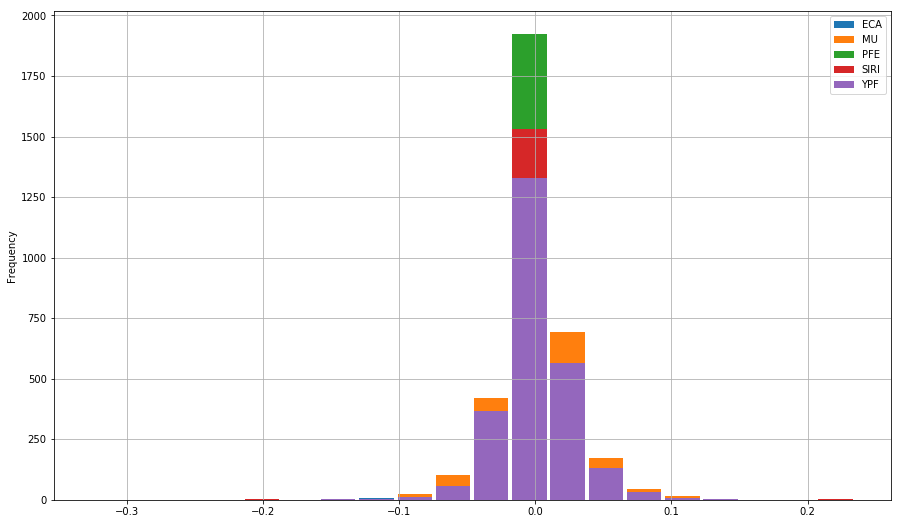

In [19]:
simple_daily_return.plot.hist(grid=True, bins=20, rwidth=0.9 ,figsize=(15,9))

In [20]:
print( "============= MEAN ============== \n" + repr(simple_daily_return.mean()) )
print( "=========== VARIANCE ============ \n" + repr(simple_daily_return.var()) )
print( "============= SKEW ============== \n" + repr(simple_daily_return.skew()) )
print( "=========== KURTOSIS ============ \n" + repr(simple_daily_return.kurtosis()) )

============= MEAN ============== 
ECA    -0.000038
MU      0.001374
PFE     0.000676
SIRI    0.001441
YPF     0.000281
dtype: float64
=========== VARIANCE ============ 
ECA     0.000745
MU      0.000938
PFE     0.000143
SIRI    0.000617
YPF     0.000750
dtype: float64
============= SKEW ============== 
ECA     0.355825
MU      0.159107
PFE     0.203764
SIRI    0.657605
YPF    -0.638205
dtype: float64
=========== KURTOSIS ============ 
ECA      4.852793
MU       3.456441
PFE      2.529880
SIRI    15.306270
YPF     11.281492
dtype: float64


In [21]:
from scipy import stats

In [22]:
# Will test about normal distribution
# Source is http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/
def hypothesis_testing( data , name = "ECA"):
    data.sort()
    hist , bin_edges = numpy.histogram( data )
    mid_edges = []
    for order in range( len(bin_edges) -1 ):
        mid_edges.append( bin_edges[order] + bin_edges[order+1] )
        mid_edges[order]/=2
    n, min_max, mean, var, skew, kurt = stats.describe(data[:math.floor(len(data)*0.75)])
    R = stats.norm.interval(0.95,loc=mean,scale=bin_edges[1]-bin_edges[0])
    check_mean = numpy.mean( data[math.floor(len(data)*0.75):] )
    if( R[0] <= check_mean and check_mean <= R[1] ):
        print( name + " IS normal distibution")
    else:
        print( name + " NOT is normal distibution")
# Divide data to 2 part 75 and 25 percent
print( "USE hypothesis testing")    
for key in simple_daily_return.keys() :
    hypothesis_testing(simple_daily_return[key].values , key )

USE hypothesis testing
ECA IS normal distibution
MU IS normal distibution
PFE IS normal distibution
SIRI IS normal distibution
YPF IS normal distibution


In [24]:
#excecise 6 will find P_t for calculate 20%Lower Bound and 30% Upper Bound
time_set = (5 , 21 , 63 , 250 )
# Function page 44 P_T = P_0 * exp( sum( r from 1 to T ) )
def find_bound( key ):
    answer = []
    count_order = 0
    sum = 0
    for run in range(0 , time_set[len(time_set)-1] + 1):
        sum += log_daily_return[key][run]
        if run == time_set[count_order]:
            temp = data[focus_main_key][key][0]*math.exp( sum )
            answer.append( (temp*0.8 , temp*1.3 ) )
            count_order+=1
    return answer
bound={}
for key in simple_daily_return.keys() :
    bound[key] = find_bound( key )
bound

{'ECA': [(15.2724, 24.81765),
  (17.840479999999996, 28.990779999999994),
  (15.588000000000001, 25.3305),
  (21.570320000000002, 35.051770000000005)],
 'MU': [(3.4399999999999995, 5.589999999999999),
  (4.311999999999999, 7.006999999999999),
  (3.7600000000000002, 6.11),
  (8.479999999999999, 13.779999999999998)],
 'PFE': [(7.232000000000003, 11.752000000000004),
  (7.624000000000004, 12.389000000000006),
  (8.000000000000004, 13.000000000000005),
  (9.536, 15.496)],
 'SIRI': [(0.272, 0.44200000000000006),
  (0.40800000000000003, 0.663),
  (0.32, 0.52),
  (0.6559999999999999, 1.0659999999999998)],
 'YPF': [(15.216000000000001, 24.726),
  (17.76, 28.860000000000003),
  (22.096, 35.906),
  (28.336, 46.04599999999999)]}

In [25]:
# Excercise 07 historical volatility page 74 lecture 2
def historical_volatility( data_set ):
    answer = 0
    for data in data_set :
        answer = math.pow( data , 2 )
    return math.sqrt( answer / len( data_set ) )

for key in log_daily_return.keys():
    print("Historical volatility of " + key + " is " + str( historical_volatility(log_daily_return[key].values)))

Historical volatility of ECA is 0.0009934024122158157
Historical volatility of MU is 0.000674305789621887
Historical volatility of PFE is 3.314432279737171e-05
Historical volatility of SIRI is 0.00016967170983702063
Historical volatility of YPF is 0.00015373322674959742


In [26]:
# Excercise 07 annualize historical volatility page 75 lecture 2 
# Because this is year we must to find historical volatility individual year and multiply sqrt of period time
limit_set = []
for run in range( len(count_data[stocks_key[0]].values ) ):
    limit_set.append(sum(count_data[stocks_key[0]].values[:run+1]))

def annualize_volatility( data_set  ):
    run_data = 0
    run_count = 0
    answer = []
    temp = 0
    while run_count < len( limit_set ):
        temp += math.pow(data_set[run_data] , 2 )
        run_data += 1
        if run_data == limit_set[ run_count ]:
            answer.append(math.sqrt(temp / count_data[stocks_key[0]][run_count]) 
                          * math.sqrt(count_data[stocks_key[0]][run_count])) 
            run_count+=1
            temp = 0
    return answer

list_annualize_volatility = annualize_return.copy()
collect_calculate = []

for key in log_daily_return.keys():
    collect_calculate = annualize_volatility(log_daily_return[key].values)
    for run in range( len( collect_calculate) ):
        list_annualize_volatility[key][run] = collect_calculate[run]
        
list_annualize_volatility

,ECA,MU,PFE,SIRI,YPF
Date,,,,,
2009-01-01,0.342699,0.499028,0.220565,0.767600,0.357347
2010-01-01,0.293335,0.511108,0.212627,0.558310,0.299645
2011-01-03,0.366645,0.658871,0.242962,0.471567,0.368312
2012-01-02,0.360953,0.424545,0.128088,0.335553,0.703758
2013-01-01,0.239684,0.383676,0.163009,0.244320,0.436413
2014-01-01,0.329053,0.373956,0.160629,0.206653,0.530439
2015-01-01,0.532914,0.498642,0.199821,0.183110,0.419072
2016-01-01,0.739854,0.509276,0.185636,0.198453,0.367257
2017-01-02,0.399944,0.355333,0.111775,0.214973,0.326260


In [27]:
# Excercise 8 Compute range-based volatility by Garman and Klass page 77 lecture 2
two_ln_two_sub_1 = 2*log_base_e(2) - 1
range_based_volatility_GK = {}
for key in stocks_key:
    summation = 0
    run = 0
    while run < data.shape[0]:
        summation += (0.5*log_base_e( math.pow( data['High'][key][run]/data['Low'][key][run] , 2) ) -
                     (two_ln_two_sub_1 * log_base_e( math.pow( data['Close'][key][run] / data['Open'][key][run] , 2) ) ) )
        run+=1
    summation /= data.shape[0]
    range_based_volatility_GK[key] = math.sqrt(summation)

range_based_volatility_GK

{'MU': 0.19671055676962698,
 'SIRI': 0.17242885365102487,
 'ECA': 0.18511522544876163,
 'PFE': 0.12773079709973653,
 'YPF': 0.19129921165344455}

In [28]:
constant_number = 0.25 / log_base_e(2) / data.shape[0]
range_based_volatility_P = {}
for key in stocks_key:
    summation = 0
    run = 0
    while run < data.shape[0]:
        summation += (0.5*log_base_e( math.pow( data['High'][key][run]/data['Low'][key][run] , 2) ) )
        run+=1
    summation /= data.shape[0]
    range_based_volatility_P[key] = math.sqrt(summation)

range_based_volatility_GK

{'MU': 0.19671055676962698,
 'SIRI': 0.17242885365102487,
 'ECA': 0.18511522544876163,
 'PFE': 0.12773079709973653,
 'YPF': 0.19129921165344455}

In [ ]:
# Excercise 9 Calculate EWMA page 79 lecture 2
def EWMA( data_set , parameter , t ):
    summation = 0
    run = 1
    while run <= t :
        summation = math.pow( parameter , run - 1 ) * math.pow( data_set[ t - run ] ,2 )

EWMA_dictionary = {}
for key in stocks_key:
    EWMA_dictionary[ key ] = math.sqrt(EWMA( log_daily_return[key].values , 0.94 , 200 ) )
EWMA_dictionary